# **How Vectors are Stored in Memory: Python Lists vs. NumPy Arrays**

## **1. Memory Storage: Python List vs. NumPy Array (float64)**

Python lists store **references to objects**, meaning each float is a **separate object** in memory.  
In contrast, **NumPy arrays store raw numerical values in contiguous memory**, making them more memory-efficient.

### **Key Differences**
- **Python Lists**  
  - Store **pointers** to individual float objects.  
  - Each float is an **independent object** with its own memory address.  
  - Leads to **higher memory overhead**.  

- **NumPy Arrays**  
  - Store **values directly** in a **single, contiguous memory block**.  
  - Avoids the overhead of object references.  
  - Leads to **faster computations and lower memory usage**.  

---

# **Understanding Memory Layout in NumPy (float64)**

## **1. Memory Addresses of a NumPy Vector (float64)**

NumPy ensures **contiguous memory storage**, meaning each element is placed at a **fixed offset** from the base memory address.

### **Memory Address Calculation**
- The **base memory address** of a NumPy array is given by:
  ```python
  arr.ctypes.data
	•Each float64 element occupies 8 bytes in memory.
	•The memory address of an element at index ( i ) is calculated as:

$$
\text{Memory Address} = \text{Base Address} + i \times \text{Item Size}
$$
	•	Since float64 has 8 bytes per element, each address increases by 8 bytes per index.

2. IEEE 754 Binary64 Representation of float64 Numbers

Each float64 number in NumPy follows the IEEE 754 Binary64 format, which consists of:
	•	1 bit for the sign (determines positive or negative values).
	•	11 bits for the exponent (defines the scale of the number).
	•	52 bits for the mantissa (fractional part that determines precision).

This structured format ensures consistent numerical representation across different computing platforms

## **Comparison Table: Python Lists vs. NumPy Arrays**

| **Feature**          | **Python List** | **NumPy Array (float64)** |
|----------------------|----------------|---------------------------|
| **Storage Type**     | References (pointers) to objects | Contiguous memory block |
| **Memory Efficiency** | High overhead (separate objects) | Low overhead (compact storage) |
| **Access Speed**     | Slower (indirect via references) | Faster (direct memory access) |
| **Memory Addressing** | Unpredictable (depends on object placement) | Fixed offset per element |
| **Binary Representation** | Not directly accessible | IEEE 754 Binary64 |

In [11]:
import sys 
import numpy as np 
import matplotlib as plt 

# **Memory Analisis**

In [29]:
## Let's define a list and an array

py_list=[1.0, 2.0, 3.0, 4.0]

np_array = np.array([1.0, 2.0, 3.0, 4.0], dtype=np.float64)


### **Object list memory usage analysis**

In [42]:
##object list structure
type(py_list)
help(py_list)
dir(py_list)

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |
 |  Built-in mutable sequence.
 |
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |
 |  Methods defined here:
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __contains__(self, key, /)
 |      Return bool(key in self).
 |
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |
 |  __eq__(self, value, /)
 |      Return self==value.
 |
 |  __ge__(self, value, /)
 |      Return self>=value.
 |
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |
 |  __getitem__(self, index, /)
 |      Return self[index].
 |
 |  __gt__(self, value, /)
 |      Return self>value.
 |
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __it

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [44]:

list_address = id(py_list)

element_addresses = [id(item) for item in py_list]

# Get reference addresses (Python list internally stores pointers to elements)
ref_addresses = [ctypes.addressof(ctypes.py_object(item)) for item in py_list]

# Print memory addresses
print(f"Python List Object Address: {list_address}")
print("References to Elements:")
for i, ref_addr in enumerate(ref_addresses):
    print(f"Ref {i+1} (for {py_list[i]}) is at memory address: {ref_addr}")

print("\nElements (Actual Float Objects):")
for i, addr in enumerate(element_addresses):
    print(f"Element {py_list[i]} is at memory address: {addr}")

# Size of the list object itself (stores references)
list_size = sys.getsizeof(py_list)

# Size of individual elements (each float is an independent Python object)
elements_size = sum(sys.getsizeof(item) for item in py_list)

# Total memory usage
list_total_size = list_size + elements_size

print(f"\nSize of list object: {list_size} bytes")
print(f"Size of elements: {elements_size} bytes")
print(f"Total memory usage: {list_total_size} bytes")

Python List Object Address: 4945128384
References to Elements:
Ref 1 (for 1.0) is at memory address: 4949576600
Ref 2 (for 2.0) is at memory address: 4949576600
Ref 3 (for 3.0) is at memory address: 4949576600
Ref 4 (for 4.0) is at memory address: 4949576600

Elements (Actual Float Objects):
Element 1.0 is at memory address: 4954006704
Element 2.0 is at memory address: 4954009776
Element 3.0 is at memory address: 4954009360
Element 4.0 is at memory address: 4948622416

Size of list object: 88 bytes
Size of elements: 96 bytes
Total memory usage: 184 bytes


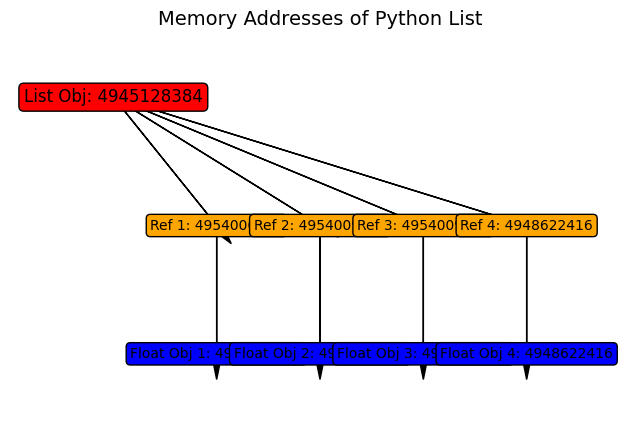

In [45]:
import ctypes

def visualize_python_list_memory(py_list):
    """
    Visualize the memory addresses of a Python list, showing references and actual float objects.
    """
    num_elements = len(py_list)

    # Get memory addresses
    list_address = id(py_list)
    ref_addresses = [id(py_list[i]) for i in range(num_elements)]

    # Create figure
    fig, ax = plt.subplots(figsize=(num_elements * 2, 5))

    # Plot Python List Object memory address
    ax.text(0, 2, f"List Obj: {list_address}", fontsize=12, ha="center", va="center",
            bbox=dict(facecolor="red", edgecolor="black", boxstyle="round,pad=0.3"))

    # Plot Reference addresses
    for i, addr in enumerate(ref_addresses):
        ax.text(i + 1, 1, f"Ref {i+1}: {addr}", fontsize=10, ha="center", va="center",
                bbox=dict(facecolor="orange", edgecolor="black", boxstyle="round,pad=0.3"))
        # Draw arrow from List Object to References
        ax.arrow(0, 2, (i + 1) - 0, -1, head_width=0.1, head_length=0.2, fc="black", ec="black")

    # Plot Float Object addresses
    for i, addr in enumerate(ref_addresses):
        ax.text(i + 1, 0, f"Float Obj {i+1}: {addr}", fontsize=10, ha="center", va="center",
                bbox=dict(facecolor="blue", edgecolor="black", boxstyle="round,pad=0.3"))
        # Draw arrow from Reference to Float Object
        ax.arrow(i + 1, 1, 0, -1, head_width=0.1, head_length=0.2, fc="black", ec="black")

    # Formatting
    ax.set_xlim(-1, num_elements + 1)
    ax.set_ylim(-0.5, 2.5)
    ax.set_yticks([2, 1, 0])
    ax.set_yticklabels(["Python List Obj", "References", "Float Objects"])
    ax.set_title("Memory Addresses of Python List", fontsize=14)
    ax.axis("off")

    plt.show()

# Visualize memory addresses of the Python list
visualize_python_list_memory(py_list)

### **Numpy array memory usage analysis**

In [46]:
##numpy array structure and info
print(type(np_array))
print(f"Shape: {np_array.shape}")  # (rows, columns)
print(f"Number of elements: {np_array.size}")  # Total elements
print(f"Dimensions: {np_array.ndim}")  # Number of dimensions

<class 'numpy.ndarray'>
Shape: (4,)
Number of elements: 4
Dimensions: 1


In [47]:
dir(np_array)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


In [48]:
# NumPy array (contiguous float64 storage)


# Base memory address
print(f"Base memory address of array: {np_array.ctypes.data}")

# Individual element addresses
for i in range(len(np_array)):
    print(f"Element {np_array[i]} is at memory address: {np_array.ctypes.data + i * np_array.itemsize}")

print("NumPy array total memory size:", np_array.nbytes, "bytes")

Base memory address of array: 5377738448
Element 1.0 is at memory address: 5377738448
Element 2.0 is at memory address: 5377738456
Element 3.0 is at memory address: 5377738464
Element 4.0 is at memory address: 5377738472
NumPy array total memory size: 32 bytes


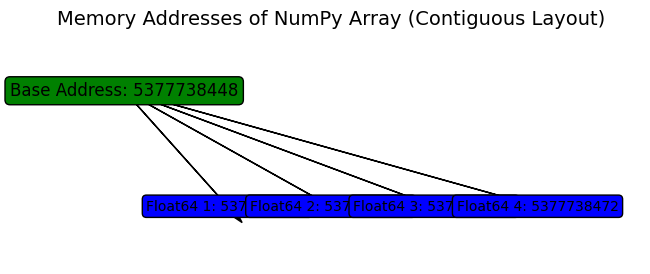

In [49]:
def visualize_numpy_array_memory(np_array):
    """
    Visualize the memory addresses of a NumPy array, showing its contiguous storage layout.
    """
    num_elements = len(np_array)
    base_address = np_array.ctypes.data
    element_addresses = [base_address + i * np_array.itemsize for i in range(num_elements)]

    # Create figure
    fig, ax = plt.subplots(figsize=(num_elements * 2, 3))

    # Plot Base memory address
    ax.text(0, 1, f"Base Address: {base_address}", fontsize=12, ha="center", va="center",
            bbox=dict(facecolor="green", edgecolor="black", boxstyle="round,pad=0.3"))

    # Plot Element memory addresses
    for i, addr in enumerate(element_addresses):
        ax.text(i + 1, 0, f"Float64 {i+1}: {addr}", fontsize=10, ha="center", va="center",
                bbox=dict(facecolor="blue", edgecolor="black", boxstyle="round,pad=0.3"))

        # Draw arrow from Base Address to each element
        ax.arrow(0, 1, (i + 1) - 0, -1, head_width=0.1, head_length=0.2, fc="black", ec="black")

    # Formatting
    ax.set_xlim(-1, num_elements + 1)
    ax.set_ylim(-0.5, 1.5)
    ax.set_yticks([1, 0])
    ax.set_yticklabels(["Base Address", "Float64 Elements"])
    ax.set_title("Memory Addresses of NumPy Array (Contiguous Layout)", fontsize=14)
    ax.axis("off")

    plt.show()

# Visualize memory addresses of the NumPy array
visualize_numpy_array_memory(np_array)

## **Memory Usage Comparison**

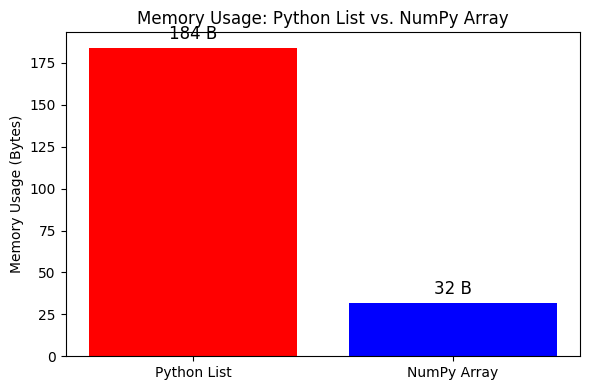

In [51]:
import matplotlib.pyplot as plt

# Data for visualization
categories = ["Python List", "NumPy Array"]
memory_usage = [list_total_size, np_array.nbytes]  # Values from the previous calculation

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(categories, memory_usage, color=['red', 'blue'])
plt.ylabel("Memory Usage (Bytes)")
plt.title("Memory Usage: Python List vs. NumPy Array")

# Annotate bars with exact values
for i, value in enumerate(memory_usage):
    plt.text(i, value + 5, f"{value} B", ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## **Comparison Table: Memory Storage and IEEE 754 Representation in NumPy**
| **Concept**         | **Explanation** |
|---------------------|------------------------------------------------|
| **Memory Layout**   | NumPy stores elements **contiguously in memory**. |
| **Address Calculation** | Address increases by `8 bytes` per `float64` element. |
| **Memory Strides**  | Each `float64` element is spaced `8 bytes` apart. |
| **Base Address**    | The starting memory location is given by `arr.ctypes.data`. |
| **Memory Address Formula** | $\text{Memory Address} = \text{Base Address} + i \times \text{Item Size}$ |
| **IEEE 754 Structure** | Floats are stored as `64-bit binary` values (1-bit sign, 11-bit exponent, 52-bit fraction). |
| **Binary Representation Extraction** | NumPy allows direct access to raw binary format using `tobytes()` and `frombuffer()`. |

**NumPy provides efficient memory storage and direct access to floating-point representations.**